In [1]:
from model import *
import sys
import itertools
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots
from sklearn.metrics import accuracy_score, classification_report

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=1)

In [27]:
def create_sort_dataset(dataset_length, seq_length, max_number=999, fraction=0.8):
    x_train = np.random.randint(low=0, high=max_number+1, size=(int(dataset_length*fraction),
                                                                seq_length,
                                                                1))
    y_train = np.sort(x_train, axis=1)
    
    x_test = np.random.randint(low=0, high=max_number+1, size=(int(dataset_length*(1-fraction)),
                                                               seq_length,
                                                               1))
    y_test = np.sort(x_test, axis=1)
    
    return x_train, y_train, x_test, y_test

def create_dummy_dataset(dataset_length, seq_length, max_number):
    lower_bound = -1 * max_number
    x_train = np.random.randint(low=lower_bound, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_train = np.where(x_train.sum(axis=2) > 0, 1, 0).reshape(x_train.shape)
    
    x_test = np.random.randint(low=lower_bound, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_test = np.where(x_test.sum(axis=2) > 0, 1, 0).reshape(x_train.shape)
    
    return x_train, y_train, x_test, y_test

def evaluate(y_test, x_test, model):
    y_pred = model.predict(x_test)
    loss = model.loss(model.predict_proba(x_test), y_test)
    
    print(f'Cross entropy loss {loss}')
    print('-'*100)
    print(classification_report(y_test.flatten(), y_pred.flatten()))

In [28]:
# Set hyper-parameters
batch_size = 20  # Size of the minibatches (number of samples)
max_num = 10 
seq_length = 10
hidden_size = 50 
dataset_size = 2000
epoch = 40

x_train, y_train, x_test, y_test = create_sort_dataset(dataset_size, seq_length, max_num)

input_size = 1
output_size = max_num+1

Epoch 1/40
TRAIN: Cross entropy loss:  2.346970813000275
VALIDATION: Cross entropy loss:  2.26811318515834
Epoch 2/40
TRAIN: Cross entropy loss:  2.066623147486628
VALIDATION: Cross entropy loss:  1.9914030424459972
Epoch 3/40
TRAIN: Cross entropy loss:  1.8040916285920912
VALIDATION: Cross entropy loss:  1.8013318943082866
Epoch 4/40
TRAIN: Cross entropy loss:  1.6541423311804386
VALIDATION: Cross entropy loss:  1.690655748386167
Epoch 5/40
TRAIN: Cross entropy loss:  1.568382425195711
VALIDATION: Cross entropy loss:  1.623146553642545
Epoch 6/40
TRAIN: Cross entropy loss:  1.5160000394503217
VALIDATION: Cross entropy loss:  1.6091421095183216
Epoch 7/40
TRAIN: Cross entropy loss:  1.481751501604559
VALIDATION: Cross entropy loss:  1.6769124105705329
Epoch 8/40
TRAIN: Cross entropy loss:  1.456474135982532
VALIDATION: Cross entropy loss:  1.7138098598896563
Epoch 9/40
TRAIN: Cross entropy loss:  1.4358267896998844
VALIDATION: Cross entropy loss:  1.5706115873691735
Epoch 10/40
TRAIN: 

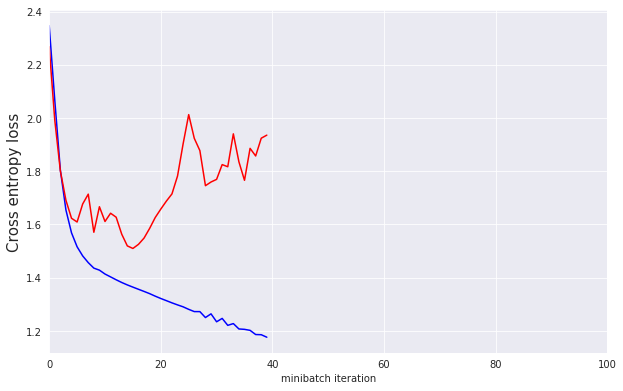

In [29]:
# Create the network
model = ModelSort(input_size, output_size, hidden_size, seq_length)

train_loss = []
validation_loss = []

for i in range(epoch):
    print(f'Epoch {i+1}/{epoch}')
    epoch_train_loss = []
    
    for mb in range(dataset_size // batch_size):
        x_batch = x_train[mb:mb + batch_size]  # Input minibatch
        y_batch = y_train[mb:mb + batch_size]  # Target minibatch
        model.train_on_batch(x_batch, y_batch)
        
        loss = model.loss(model.predict_proba(x_batch), y_batch)
        epoch_train_loss.append(loss)
        

    train_loss.append(np.mean(epoch_train_loss))
    validation_loss.append(model.loss(model.predict_proba(x_test), y_test))


    print("TRAIN: Cross entropy loss: ", train_loss[-1])
    print("VALIDATION: Cross entropy loss: ", validation_loss[-1])



# Plot the loss over the iterations
fig = plt.figure(figsize=(10, 7))
plt.plot(train_loss, 'b-')
plt.plot(validation_loss, 'r')
plt.xlabel('minibatch iteration')
plt.ylabel('Cross entropy loss', fontsize=15)
plt.xlim(0, 100)
fig.subplots_adjust(bottom=0.2)
plt.show()
#

In [30]:
evaluate(y_test, x_test, model)

Cross entropy loss 1.9355701101422838
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       366
           1       0.33      0.35      0.34       339
           2       0.28      0.27      0.27       368
           3       0.28      0.14      0.19       395
           4       0.24      0.05      0.08       344
           5       0.20      0.25      0.22       320
           6       0.24      0.19      0.21       416
           7       0.16      0.15      0.16       352
           8       0.19      0.17      0.18       375
           9       0.21      0.30      0.25       366
          10       0.45      0.89      0.59       349

   micro avg       0.31      0.31      0.31      3990
   macro avg       0.29      0.31      0.29      3990
weighted avg       0.29      0.31      0.28      3990

